# Prosper Loan Data Exploration
## by Dina El-kholy

## Investigation Overview

> In this project, I wanted to investigate the features that could be used to predict the loan status for a borrower. The main features I focused on was LoanOriginalAmount, StatedMonthlyIncome, DebtToIncomeRatio, Term,EmploymentStatus, EmploymentStatusDuration, Occupation, ListingCategory, and TotalProsperLoans.

## Dataset Overview

> This dataset contains information about 113,937 loans represented by 81 features such as the loan amount, the monthly income, the employment status, and the loan status. More information about the dataset features can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')
#select columns from the dataset
sub_cols = ["LoanStatus", "LoanOriginalAmount", "StatedMonthlyIncome", "DebtToIncomeRatio", "Term"
            ,"EmploymentStatus", "EmploymentStatusDuration", "Occupation", "ListingCategory (numeric)",
            "TotalProsperLoans"]
loans_sub = loans[sub_cols]
#remove cancelled as it is considered as an outlier
loans_sub.drop(loans_sub[loans_sub['LoanStatus'] =="Cancelled"].index, inplace = True)
#modify the values in LoanStatus such that the values can only be [Current, Completed, Defaulted,
#                                                                  FinalPaymentInProgress, PastDue]
keep_vals = ["Current", "Completed", "Defaulted","FinalPaymentInProgress"]
cond = loans_sub.LoanStatus.isin(keep_vals)
loans_sub.loc[~cond, "LoanStatus"] = "PastDue"
#replace null in TotalProsperLoans with zeros
loans_sub['TotalProsperLoans'] = loans_sub['TotalProsperLoans'].fillna(0)
#drop rows with null values
loans_sub = loans_sub.dropna()
#drop duplicates
loans_sub = loans_sub.drop_duplicates()

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualizing the Loan Status in the dataset

> - Most loans are current or completed loans. Almost none of the loans are cancelled.
> - It looks like most loans are paid as expected. However, some are defaulted or past due; I want to inspect whether any of the features can explain the delay?

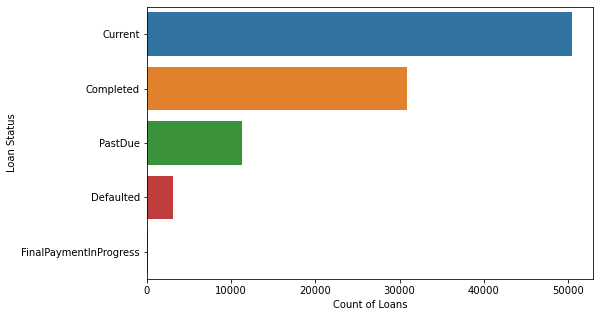

In [3]:
# Visulizing the loan status
plt.figure(figsize=[8, 5])
status = loans_sub['LoanStatus'].value_counts().index
sb.countplot(data=loans_sub, y='LoanStatus', order=status);
plt.xlabel('Count of Loans');
plt.ylabel('Loan Status');

## Visualizing the Monthly Income

> The averge income is skewed towards the right and the avergae income is 5000. 

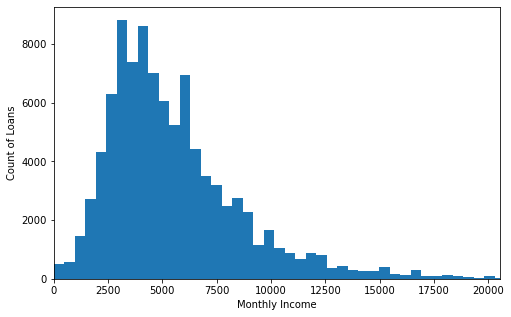

In [4]:
#define the outliers' boundary
limit = loans_sub['StatedMonthlyIncome'].mean() + 3*loans_sub['StatedMonthlyIncome'].std()
#visualize the income
plt.figure(figsize=[8, 5])
plt.hist(data=loans_sub, x='StatedMonthlyIncome', bins =1000);
plt.xlim(0,limit);
plt.xlabel('Monthly Income');
plt.ylabel('Count of Loans');

## Visualizing the relation between all numerical features
> From the map, one can see that there is no strong correlation between any of the features. However, the loan amount and the monthly income seem to be correlated. Also, the term of the loan and the loan amount are correlated. There is also a negative correlation between the monthly income and the debt to income ratio which is expected.

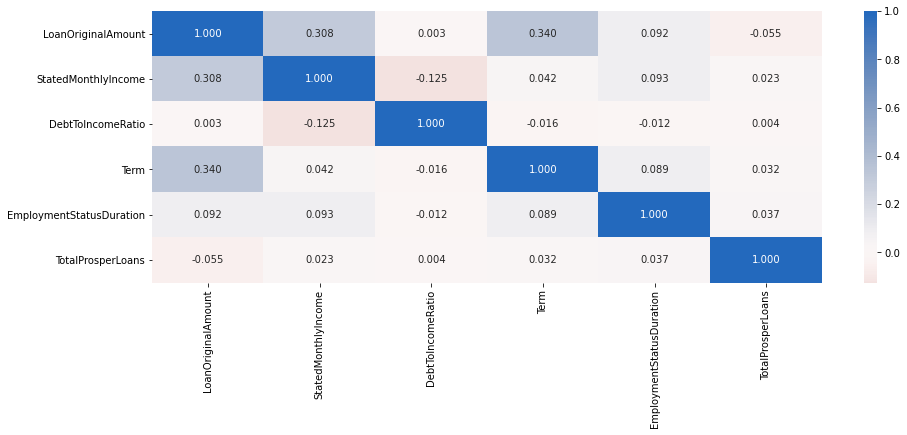

In [5]:
numeric_cols = ["LoanOriginalAmount", "StatedMonthlyIncome", "DebtToIncomeRatio", "Term",
                "EmploymentStatusDuration","TotalProsperLoans"]
categorical_cols = ["LoanStatus","EmploymentStatus","Occupation", "ListingCategory (numeric)"]
# correlation plot between all numeric columns
plt.figure(figsize = [15, 5])
sb.heatmap(loans_sub[numeric_cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

## Visualizing the relation between monthly income, debt to income ratio and loan status
> - From the plots, one can see that there are many outliers in the data especially in the DebtToIncomeRatio feature. 
>- Also, we can see that the distribution of the pastDue and the Defaulted loans are nearly the same in regards to the loan amount and the monthly income. I think it will be safe to assume that past due loans will be defaulted eventually. Hence, we can label them all as defaulted loans. I will do that in a future step. 
> - Borrowers with Completed or final payment in progress loans seem to have higher income that the borrowers whose loans were defaulted.  

<Figure size 1080x720 with 0 Axes>

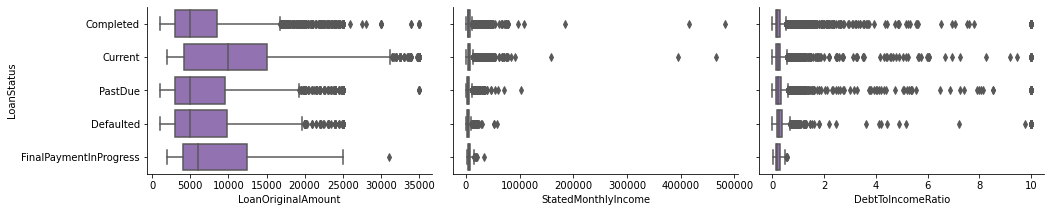

In [6]:
#box grid between different categorical values and the LoanStatus
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[4]
    sb.boxplot(x=x, y=y, color = default_color);

x_vars = ["LoanOriginalAmount", "StatedMonthlyIncome","DebtToIncomeRatio" ]
y_vars = ["LoanStatus"]
plt.figure(figsize = [15, 10]);
g = sb.PairGrid(data = loans_sub, y_vars = y_vars, x_vars = x_vars,
                height = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

## Visualizing the relation between employment status, loan original amount and loan status
> - Loans with higher loan amount are usually defaulted as expected. 
> - Self-employed tend to request the largest loans while not employed borrowers tend to request the lowest loans (expected).
> - Full time borrowers tend to request higher loans than part time borrowers (expected).

Text(0.5, 0, 'Employment Status')

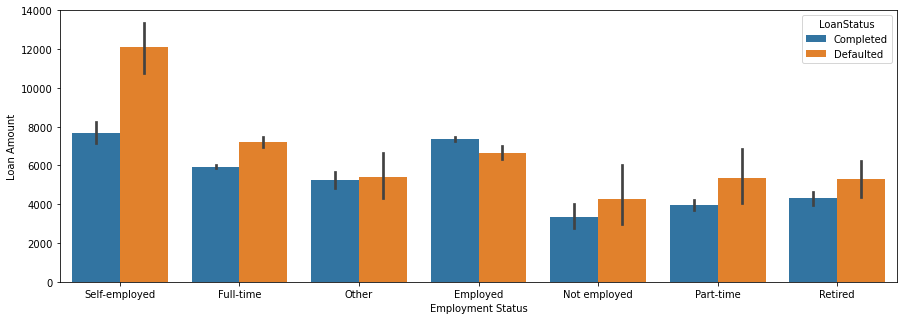

In [7]:
keep_vals = ["Completed", "Defaulted"]
cond = loans_sub.LoanStatus.isin(keep_vals)
loans_vis = loans_sub[cond]
#check if the employment status has an effect
plt.figure(figsize = [15, 5]);
sb.barplot(data= loans_vis, x='EmploymentStatus', y='LoanOriginalAmount',
           hue='LoanStatus');
plt.ylabel('Loan Amount')
plt.xlabel('Employment Status')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slides.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] Writing 700166 bytes to slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slides.slides.html
Use Control-C to stop this server
